# Challenge Latam

In [60]:
#Ejecutar esta linea de comando para verificar que la versión de las librerías correspondan a los resultados expuestos en este notebook

!pip install -r requirements.txt

In [1]:
#Importar librerías utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime,date,timedelta,time

%matplotlib inline
seed = 1234

np.random.seed(seed)

In [2]:
def get_data(filename):
    """Get data from the challenge csv file.

    Args:
        filename (str): location of the file
    """
    data = pd.read_csv(filename,infer_datetime_format=True,low_memory=False)
    data['Fecha-I'] = pd.to_datetime(data['Fecha-I'])
    data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])

    return data

In [3]:
#Cargar la data base
df = get_data('dataset_SCL.csv')
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [4]:
#Cuenta de valores unicos por variable
df.nunique()

Fecha-I      53252
Vlo-I          584
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          861
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

In [5]:
#Cuenta de valores por categoría
print(df.groupby('DIANOM').DIANOM.count())
print(df.groupby('TIPOVUELO').TIPOVUELO.count())

DIANOM
Domingo       9796
Jueves       10251
Lunes        10131
Martes        9662
Miercoles     9722
Sabado        8352
Viernes      10292
Name: DIANOM, dtype: int64
TIPOVUELO
I    31240
N    36966
Name: TIPOVUELO, dtype: int64


In [6]:
print(df.groupby('OPERA').OPERA.count().sort_values(ascending=False))

OPERA
Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64


In [7]:
print(df.groupby('OPERA').OPERA.count().sort_values(ascending=False))

OPERA
Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64


In [8]:
df.groupby(['OPERA','TIPOVUELO']).OPERA.count().unstack(level=1)

TIPOVUELO,I,N
OPERA,,
Aerolineas Argentinas,1949.0,NaN
Aeromexico,351.0,NaN
Air Canada,565.0,NaN
Air France,358.0,NaN
Alitalia,259.0,NaN
American Airlines,757.0,NaN
Austral,74.0,NaN
Avianca,1152.0,NaN
British Airways,205.0,NaN


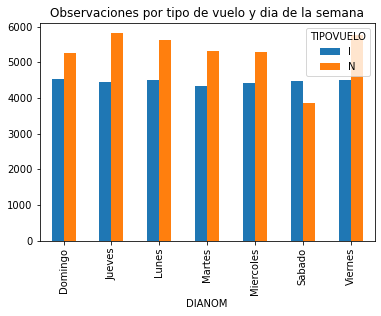

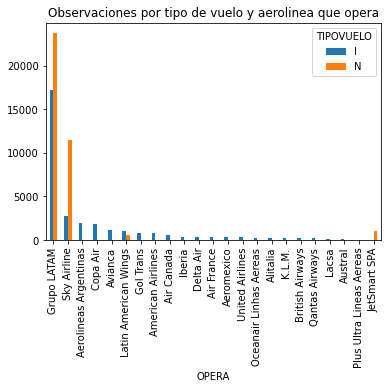

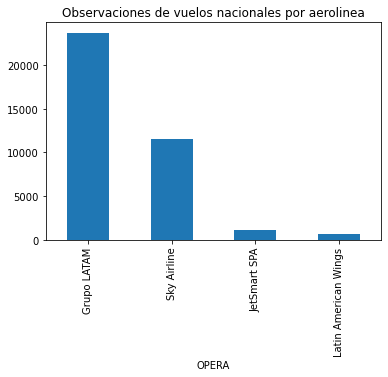

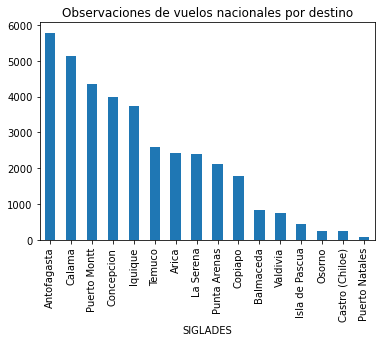

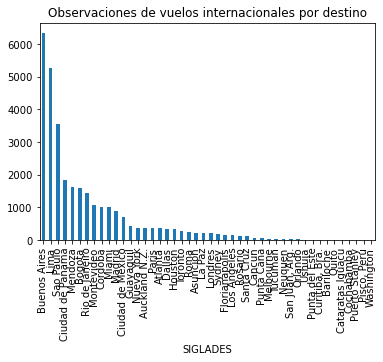

In [9]:
#Algunos gráficos descriptivos de la data

df.groupby(['TIPOVUELO','DIANOM']).count().iloc[:,0].unstack(level=0).plot(kind='bar',title='Observaciones por tipo de vuelo y dia de la semana')
plt.show()
df.groupby(['TIPOVUELO','OPERA']).count().iloc[:,0].unstack(level=0).sort_values(by='I',ascending=False).plot(kind='bar',title='Observaciones por tipo de vuelo y aerolinea que opera')
plt.show()
df.query("TIPOVUELO == 'N'").groupby(['OPERA']).count().iloc[:,0].sort_values(ascending=False).plot(kind='bar',title='Observaciones de vuelos nacionales por aerolinea')
plt.show()
df.query("TIPOVUELO == 'N'").groupby('SIGLADES').count().iloc[:,0].sort_values(ascending=False).plot(kind='bar',title='Observaciones de vuelos nacionales por destino')
plt.show()
df.query("TIPOVUELO == 'I'").groupby('SIGLADES').count().iloc[:,0].sort_values(ascending=False).plot(kind='bar',title='Observaciones de vuelos internacionales por destino')
plt.show()

La gran mayoría de las variables presentadas en la base de datos son de tipo categóricas, salvo las relacionadas con la fecha, pero requieren alguna transformación para ser utilizadas en el análisis.

Con respecto a estas variables se puede destacar que:

Las clases de dia de la semana y tipo de vuelo están relativamente balanceadas, pero al aperturar los tipos de vuelo por aerolinea nos damos cuenta que hay sólo 4 aerolineas que operan vuelos de tipo nacional, mientras que las otras solo operan vuelos de tipo nacional. La aerolinea LATAM tiene la mayor presencia de vuelos en este aeropuerto, le sigue Sky, pero se nota que la clase está desbalanceada, para tener en cuenta.

Todas los vuelos se realizan desde el mismo origen, por lo tanto, son sólo despegues. En el caso de los vuelos nacionales, aparecen mayoritariamente los destinos Antofagasta, Calama, Puerto Montt, Concepción e Iquique, mientras que en el caso de los vuelos internacionales se presentan con mayoría vuelos en latinoamerica como Buenos Aires, Lima, Sao Paulo, Ciudad de Panamá, Mendoza, Bogotá y Río de Janeiro.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
#### - temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
#### - dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
#### - atraso_15 : 1 si dif_min > 15, 0 si no.
#### - periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

In [10]:
#Se incluye hasta un día despues, para que considere todos los viajes dentro del ultimo día, ya que se toma por defecto la hora 0:00
df['temporada_alta'] = 1*1*((df['Fecha-I'].between(datetime(2017,12,15),datetime(2017,3,4))) | (df['Fecha-I'].between(datetime(2017,7,15),datetime(2017,8,1))) | (df['Fecha-I'].between(datetime(2017,9,11),datetime(2017,10,1))))
df['dif_min'] = (df['Fecha-O']-df['Fecha-I'])/np.timedelta64(1, 'm')
df['atraso_15'] = 1*(df['dif_min']>15)
df['periodo_dia'] = ["mañana" if time(5,0,0) <= x.time() <=time(11,59,59) else "tarde" 
                    if time(12,0,0) <= x.time() <= time(18,59,59) else "noche" for x in df['Fecha-I']]

In [11]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,0,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,0,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,0,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,0,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,0,-2.0,0,noche


In [12]:
columnas_synt = ['temporada_alta','dif_min','atraso_15','periodo_dia']
df[columnas_synt].to_csv('synthetic_features.csv')

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [13]:
#Destino
tasa_destino = df.groupby('SIGLADES').sum().atraso_15 / df.groupby('SIGLADES').count().atraso_15

#Aerolinea
tasa_aerolinea = df.groupby('OPERA').sum().atraso_15 / df.groupby('OPERA').count().atraso_15

#Mes del año
tasa_mesano = df.groupby('MES').sum().atraso_15 / df.groupby('MES').count().atraso_15

#dia semana
tasa_diasemana =  df.groupby('DIANOM').sum().atraso_15 / df.groupby('DIANOM').count().atraso_15

#temporada
tasa_temporada = df.groupby('temporada_alta').sum().atraso_15 / df.groupby('temporada_alta').count().atraso_15

#tipo de vuelo
tasa_tipovuelo = df.groupby('TIPOVUELO').sum().atraso_15 / df.groupby('TIPOVUELO').count().atraso_15

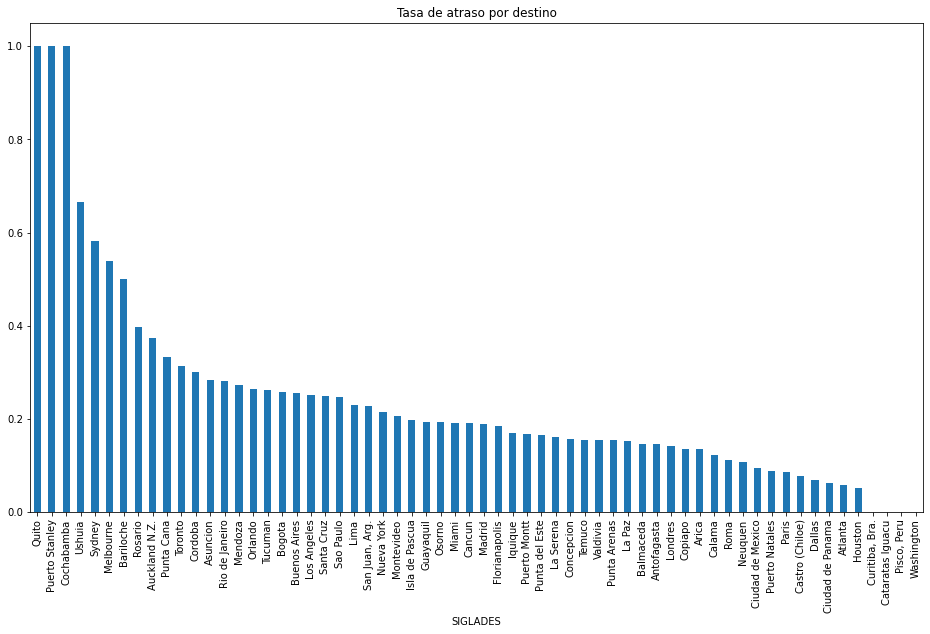

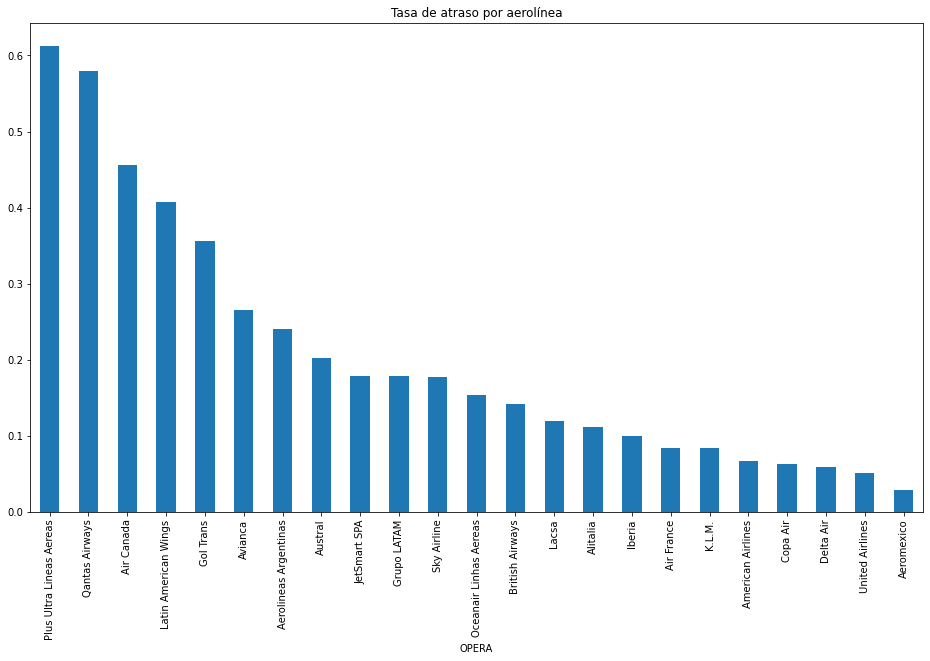

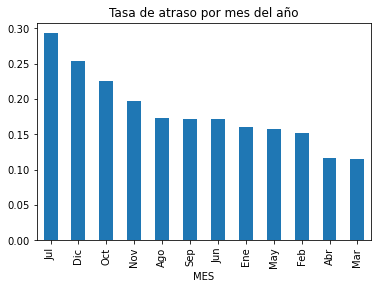

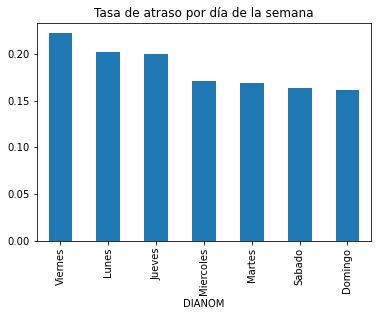

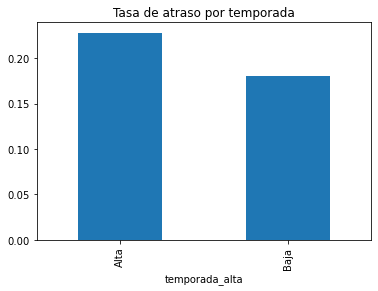

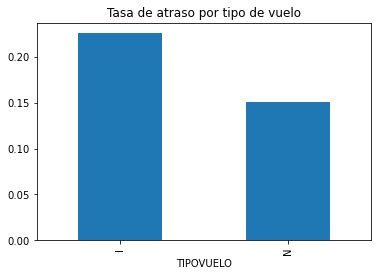

In [14]:
#Composición de la tasa de atraso por categorías

dict_mes = {1:'Ene',2:'Feb',3:'Mar',4:'Abr',5:'May',6:'Jun',7:'Jul',8:'Ago',9:'Sep',10:'Oct',11:'Nov',12:'Dic'}
dict_temporada = {0:'Baja',1:'Alta'}

tasa_destino.sort_values(ascending=False).plot(kind='bar',figsize=(16,9),title="Tasa de atraso por destino")
plt.show()
tasa_aerolinea.sort_values(ascending=False).plot(kind='bar',figsize=(16,9),title="Tasa de atraso por aerolínea")
plt.show()
tasa_mesano.sort_values(ascending=False).rename(index=dict_mes).plot(kind='bar',title="Tasa de atraso por mes del año")
plt.show()
tasa_diasemana.sort_values(ascending=False).plot(kind='bar',title="Tasa de atraso por día de la semana")
plt.show()
tasa_temporada.sort_values(ascending=False).rename(index=dict_temporada).plot(kind='bar',title="Tasa de atraso por temporada")
plt.show()
tasa_tipovuelo.sort_values(ascending=False).plot(kind='bar',title="Tasa de atraso por tipo de vuelo")
plt.show()

Se esperaría que las variables que tengan mayor correlación con la variable de atraso sean las más indicadas para predecirlas. También podemos suponer que las varables que puedan explicar mayor varianza, es decir, que su comportamiento también sea heterogéneo entre las clases, sea más probable que expliquen mejor el fenómeno en cuestión (atrasos). 

Bajo este punto de vista, las variables de destino, aerolinea y mes del año se muestran como mejores candidatas que el resto, ya que a simple vista, no se ven diferencias tan importantes en las tasas de atraso en dia de la semana, temporada alta/baja y el tipo de vuelo, en el rango [0.15,0.25].

Sin embargo, la interrelación de las variables puede cambiar la percepción a priori, por lo que debe ser evaluado más adelante con un modelo apropiado.

También es posible utilizar otras herramientas de feature engineering para seleccionar las mejores candidatos, tales como el feature importance que deriva del xgboost.

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [79]:
import xgboost as xgb
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,f1_score,recall_score,precision_score

In [16]:
def one_hot(df,cols):
    for col in cols:
        dummies = pd.get_dummies(df[col],prefix=col,drop_first=False)
        df=pd.concat([df,dummies],axis=1)
        del df[col]
    return df

In [17]:
#Se añade datos de condiciones climáticas, ya que pueden afectar la programación del vuelo según Goodman and Small (2019). https://journals.ametsoc.org/view/journals/apme/58/3/jamc-d-17-0277.1.xml
#Fuente: https://www.ncei.noaa.gov/ 
weather_data = pd.read_csv('weather_data.csv', )[['DATE','PRCP','TAVG']]
weather_data['TAVG'] = weather_data.TAVG.ffill()
weather_data['PRCP'] = weather_data.PRCP.fillna(0)
weather_data.head()

,DATE,PRCP,TAVG
0,2017-01-01,0.00,71
1,2017-01-02,0.00,75
2,2017-01-03,0.00,71
3,2017-01-04,0.00,70
4,2017-01-05,0.00,74


In [18]:
df['DATE'] = df['Fecha-I'].apply(lambda x: x.date()).astype(str)
df = df.merge(weather_data,on='DATE',how='left')
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,DATE,PRCP,TAVG
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,0,3.00,0,noche,2017-01-01,0.00,71
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,0,9.00,0,noche,2017-01-02,0.00,75
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,0,9.00,0,noche,2017-01-03,0.00,71
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,0,3.00,0,noche,2017-01-04,0.00,70
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,0,-2.00,0,noche,2017-01-05,0.00,74


In [19]:
#Se agregan más variables en relación a si lo programado/planificado, coincide con lo operado/implementado.

df['coincide_vuelo'] = 1*(df['Vlo-I']==df['Vlo-O'])
df['coincide_destino'] = 1*(df['Des-I']==df['Des-O'])
df['coincide_aerolinea'] =1*(df['Emp-I']==df['Emp-O'])

In [20]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia', 'DATE', 'PRCP', 'TAVG', 'coincide_vuelo',
       'coincide_destino', 'coincide_aerolinea'],
      dtype='object')

In [81]:
exogs = ['DIANOM','TIPOVUELO','OPERA','SIGLADES','temporada_alta','periodo_dia',
         'PRCP','TAVG','coincide_vuelo','coincide_destino','coincide_aerolinea']


one_hot_columns = ['DIANOM','TIPOVUELO','OPERA','SIGLADES','periodo_dia']

df_ = one_hot(df,one_hot_columns)

exogs_one_hot = list(set(exogs).difference(set(one_hot_columns))) + list(df_.columns.difference(df.columns))
X=df_[exogs_one_hot]
y=df.atraso_15

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.25, random_state=seed)

model = LogisticRegression(solver='lbfgs',max_iter=5000)
model.fit(trainX, trainy)

yhat = model.predict(testX)
# prob_positive = yhat[:,1]
roc_auc = roc_auc_score(testy,yhat)
accuracy = accuracy_score(testy,yhat)
precision = precision_score(testy,yhat)
recall = recall_score(testy,yhat)
f1score = f1_score(testy,yhat)
lr_metrics = pd.DataFrame({'ROC_AUC':roc_auc,'ACC':accuracy,'Precision':precision,'Recall':recall,'F1_score':f1score},index=['Logistic_Regression'])
lr_metrics

,ROC_AUC,ACC,Precision,Recall,F1_score
Logistic_Regression,0.51,0.82,0.54,0.04,0.07


In [84]:
exogs = ['DIANOM','TIPOVUELO','OPERA','SIGLADES','temporada_alta','periodo_dia',
         'PRCP','TAVG','coincide_vuelo','coincide_destino','coincide_aerolinea']


one_hot_columns = ['DIANOM','TIPOVUELO','OPERA','SIGLADES','periodo_dia']

df_ = one_hot(df,one_hot_columns)

exogs_one_hot = list(set(exogs).difference(set(one_hot_columns))) + list(df_.columns.difference(df.columns))
X=df_[exogs_one_hot]
y=df.atraso_15

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.25, random_state=seed)

model = LinearSVC()
model.fit(trainX, trainy)

yhat = model.predict(testX)
roc_auc = roc_auc_score(testy,y_hat)
accuracy = accuracy_score(testy,yhat)
precision = precision_score(testy,yhat)
recall = recall_score(testy,yhat)
f1score_ = f1_score(testy,yhat)

svc_metrics = pd.DataFrame({'ROC_AUC':roc_auc,'ACC':accuracy,'Precision':precision,'Recall':recall,'F1_score':f1score},index=['SVC'])
svc_metrics

,ROC_AUC,ACC,Precision,Recall,F1_score
SVC,0.56,0.82,0.65,0.01,0.07


In [85]:
exogs = ['DIANOM','TIPOVUELO','OPERA','SIGLADES','temporada_alta','periodo_dia',
         'PRCP','TAVG','coincide_vuelo','coincide_destino','coincide_aerolinea']
datetypes = ['category','category','category','category',int,'category',
         float,float,int,int,int]

df = df.astype(dict(zip(exogs,datetypes)))
X=df[exogs]
y=df.atraso_15

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.25, random_state=seed)

model = xgb.XGBClassifier(tree_method="hist",enable_categorical=True)
model.fit(trainX,trainy)

y_hat = model.predict(testX)
roc_auc = roc_auc_score(testy,y_hat)
accuracy = accuracy_score(testy,yhat)
precision = precision_score(testy,yhat)
recall = recall_score(testy,yhat)
f1score_ = f1_score(testy,yhat)

xgb_metrics = pd.DataFrame({'ROC_AUC':roc_auc,'ACC':accuracy,'Precision':precision,'Recall':recall,'F1_score':f1score},index=['XGB'])
xgb_metrics

,ROC_AUC,ACC,Precision,Recall,F1_score
XGB,0.56,0.82,0.65,0.01,0.07


In [43]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(trainX, testX, trainy, testy)
# models

### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?